# Section IV - Close Rate Statistics

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('agency_close_rates.csv')

In [3]:
df1.head(10)

,period,agency,leads,sales
0,2019-04-25,Agency A,165,45
1,2019-04-26,Agency A,133,56
2,2019-04-27,Agency A,126,38
3,2019-04-28,Agency A,110,11
4,2019-04-29,Agency A,154,51
5,2019-04-30,Agency A,150,36
6,2019-05-01,Agency A,138,55
7,2019-05-02,Agency A,171,49
8,2019-05-03,Agency A,165,68
9,2019-05-04,Agency A,146,35


In [4]:
df1 = df1.groupby(['period','agency']).sum()

In [5]:
df1.head()

leads  sales
period     agency                
2019-04-25 Agency A    260     62
           Agency B    178      0
           Agency C     50      7
           Agency D      7      3
           Agency E      1      1

In [6]:
df1.reset_index(level=0, inplace = True)

In [7]:
df1.reset_index(level=0, inplace = True)

In [8]:
df1.loc[df1['agency'] == 'Agency A','period'].iloc[0]

'2019-04-25'

In [52]:
def get_close_rates(list_of_agencies,start_date,end_date,aggregated):
    df = df1[:]
    df['close_rate'] = df['sales']/df['leads']
    if start_date == None:
        start_date = df.loc[df['agency'] == 'Agency A','period'].iloc[0]
    if end_date == None:
        end_date = df.loc[df['agency'] == 'Agency A','period'].loc[376]
        ## first mask
    mask1 = (df1['period'] >= start_date) & (df1['period'] <= end_date)
    if not list_of_agencies:
        list_of_agencies = df1.agency.unique()
    ## second mask
    mask2 = df['agency'].isin(list_of_agencies)
    df = df.loc[mask1]
    df = df.loc[mask2]
    ## Conditions for argument "aggregated"
    if aggregated == True:
        for a in list_of_agencies:
            df_agg1 = pd.DataFrame(df1['leads'].groupby([df1['agency']]).mean())
            df_agg1.reset_index(level=0, inplace = True)
            l = df_agg1.loc[df_agg1['agency'] == a,'leads'].iloc[0]
            
            df_agg2 = pd.DataFrame(df1['sales'].groupby([df1['agency']]).mean())
            df_agg2.reset_index(level=0, inplace = True)
            s = df_agg2.loc[df_agg2['agency'] == a,'sales'].iloc[0]
            
            avg_close_rate = float(s/l)
            print("Average Close rate for "+ str(a)+ " is "+ str(round(avg_close_rate,3)))
     
    elif aggregated == False:
        plt.figure(figsize=(16,10))
        plt.xlabel('Time Period')
        plt.ylabel('Close Rate')
        for a in list_of_agencies:
            x = df.loc[df['agency'] == a,'period']
            y = df.loc[df['agency'] == a,'close_rate']
            plt.plot(x,y)
            plt.legend(list_of_agencies)
        
        plt.show()           

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


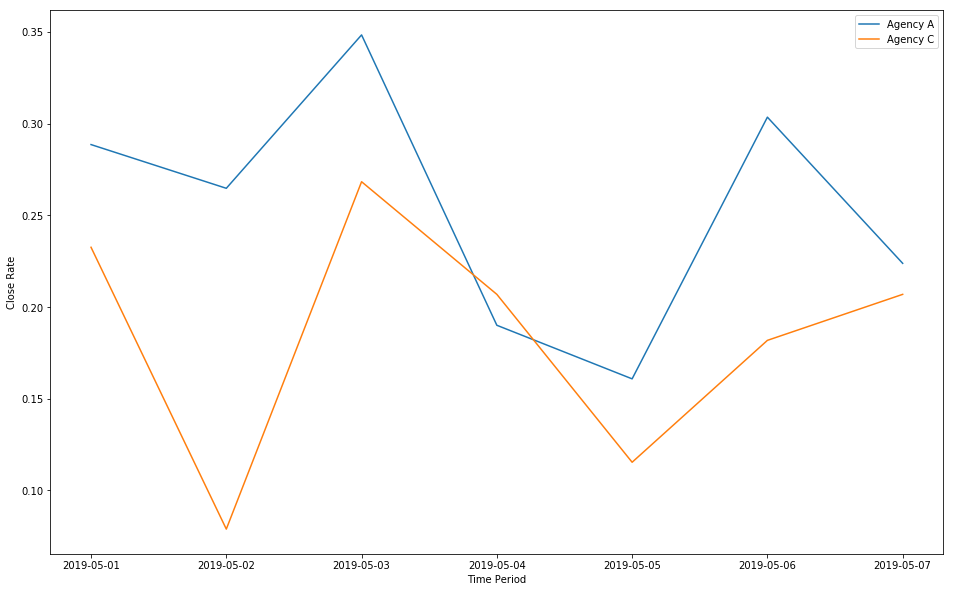

In [53]:
get_close_rates(list_of_agencies=['Agency A','Agency C'], start_date='2019-05-01', end_date='2019-05-07',
aggregated=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


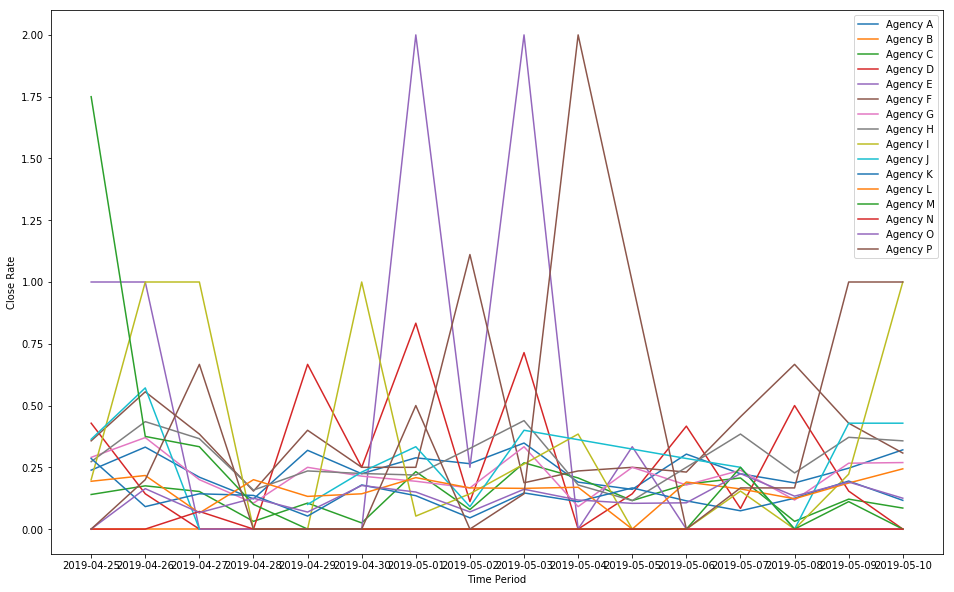

In [54]:
get_close_rates(list_of_agencies=[], start_date=None, end_date="2019-05-10", aggregated=False)

In [48]:
get_close_rates(list_of_agencies=[], start_date=None, end_date=None, aggregated=True)

Average Close rate for Agency A is 0.246
Average Close rate for Agency B is 0.0
Average Close rate for Agency C is 0.144
Average Close rate for Agency D is 0.208
Average Close rate for Agency E is 0.405
Average Close rate for Agency F is 0.271
Average Close rate for Agency G is 0.234
Average Close rate for Agency H is 0.278
Average Close rate for Agency I is 0.202
Average Close rate for Agency J is 0.286
Average Close rate for Agency K is 0.144
Average Close rate for Agency L is 0.175
Average Close rate for Agency M is 0.136
Average Close rate for Agency N is 0.003
Average Close rate for Agency O is 0.128
Average Close rate for Agency P is 0.213


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
